# Q.2] Salary_hike -> Build a prediction model for Salary_hike

In [161]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns
import pandas as pd 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

In [204]:
salaryData = pd.read_csv('Salary_Data.csv')

In [191]:
salaryData.head()
# concluding from problem statement
# 'YearsExperience' is feature
# 'Salary' is target

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [192]:
salaryData.info()
# both columns are of numerical dtype
# no null values present
# implies no need to perform imputation 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [193]:
salaryData.describe()
# inspecting moments

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [205]:
# storing feature data in X
X = salaryData[['YearsExperience']]

In [206]:
# storing target data in Y
Y = salaryData[['Salary']]

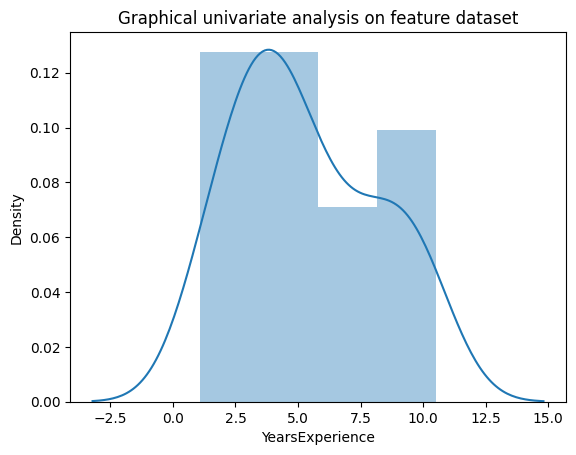

In [168]:
# Graphical univariate analysis on feature dataset
sns.distplot(X,kde=True)
plt.xlabel('YearsExperience')
plt.title('Graphical univariate analysis on feature dataset')
plt.show()
# no outliers present 

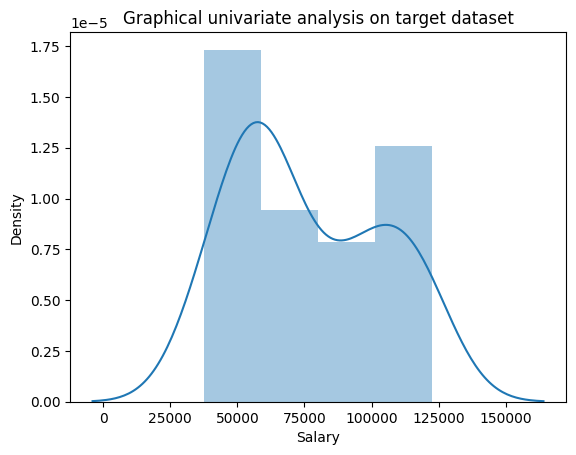

In [169]:
# Graphical univariate analysis on target dataset
sns.distplot(Y,kde=True)
plt.xlabel('Salary')
plt.title('Graphical univariate analysis on target dataset')
plt.show()
# no outliers present 

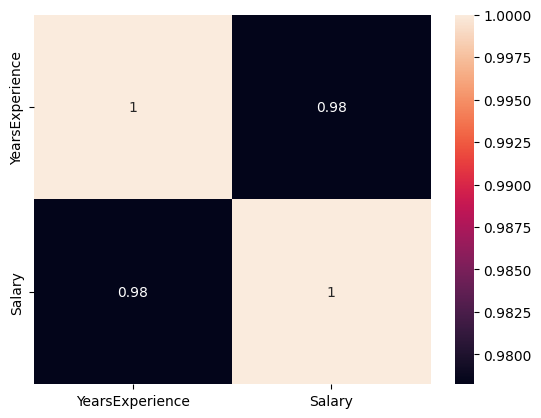

In [170]:
# bivariate analysis 
# checking for correlation between variables
sns.heatmap(salaryData.corr(), annot=True)
plt.show()
# there exists correlation between feature and target

### first model 

In [171]:
# first model using ols 
# without transformations on feature dataset 
model1 = smf.ols(formula='Salary~YearsExperience',
                data = salaryData).fit()

In [172]:
eps, beta = model1.params

In [173]:
print('intercept of best fitted line is ',eps)
print('coefficient of feature is ',beta)

intercept of best fitted line is  25792.200198668703
coefficient of feature is  9449.962321455077


In [174]:
# 'X' is 'years_experience'(feature)
# 'y_hat' is predicted value of 'salary'(target)
y_hat = beta*X + eps

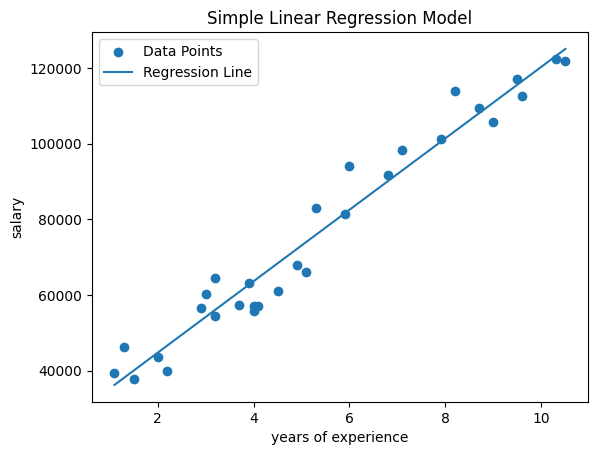

In [175]:
# plotting regression line
plt.scatter(salaryData['YearsExperience'],salaryData['Salary'],label='Data Points')
plt.title('Simple Linear Regression Model')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.plot(X,y_hat,label='Regression Line')
plt.legend()
plt.show()

In [176]:
print(f'training accuracy of model1 is {round(model1.rsquared*100,2)} %')

training accuracy of model1 is 95.7 %


## training accuracy of model1 is 95.7 %

### second model 

In [177]:
# performing log transformation on feature dataset 
newX = np.log(X)

In [178]:
# new dataframe of dataset after transformation 
newData = pd.DataFrame({'YearsExperience':newX.values.ravel(),
                        'Salary':Y.values.ravel()},
                         index=salaryData.index)

In [179]:
# second model with ols 
# with transformation of feature dataset 
model2 = smf.ols(formula='Salary~YearsExperience',
               data=newData).fit()

In [180]:
eps, beta = model2.params

In [181]:
print('intercept of best fitted line is ',eps)
print('coefficient of feature is ',beta)

intercept of best fitted line is  14927.971770057291
coefficient of feature is  40581.98795977904


In [182]:
# 'X' is 'years_experience'(feature)
# 'y_hat' is predicted value of 'salary'(target)
y_hat = beta*np.log(X) + eps

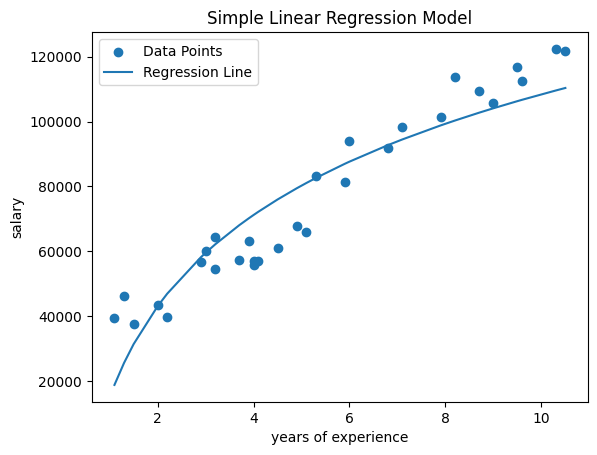

In [183]:
# plotting regression line
plt.scatter(salaryData['YearsExperience'],salaryData['Salary'],label='Data Points')
plt.title('Simple Linear Regression Model')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.plot(X,y_hat,label='Regression Line')
plt.legend()
plt.show()

In [184]:
print(f'training accuracy of model2 is {round(model2.rsquared*100,2)} %')

training accuracy of model2 is 85.39 %


## training accuracy of model2 is 85.39 %

### Third model 

In [236]:
# third model with OLS
# without transformation on feature dataset
# without adding constant 
model3 = sm.OLS(Y,X).fit()

In [221]:
y_pred = model3.predict(X)

In [227]:
beta = model3.params[0]

In [229]:
print('coefficient of feature is ',beta)

coefficient of feature is  13254.938454419256


In [230]:
# 'X' is 'years_experience'(feature)
# 'y_hat' is predicted value of 'salary'(target)
y_hat = beta*X 

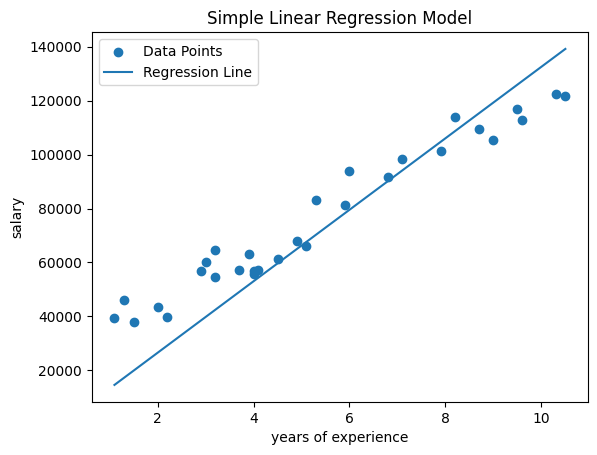

In [231]:
# plotting regression line
plt.scatter(salaryData['YearsExperience'],salaryData['Salary'],label='Data Points')
plt.title('Simple Linear Regression Model')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.plot(X,y_hat,label='Regression Line')
plt.legend()
plt.show()

In [232]:
score = r2_score(Y,y_hat)

In [234]:
print(f'training accuracy of model3 is {round(score*100,2)} %')

training accuracy of model3 is 75.9 %


## training accuracy of model3 is 75.9 %

## since model1 have highest accuracy. we will select that as our final model.